## California Housing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


check number of missing values per columns

In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

viewing those specific houses which have a bedroom number as NaN

In [7]:
df[df['total_bedrooms'].isna()][['longitude', 'latitude']] # we specify the columns we want to see 

,longitude,latitude
290,-122.16,37.77
341,-122.17,37.75
538,-122.28,37.78
563,-122.24,37.75
696,-122.10,37.69
...,...,...
20267,-119.19,34.20
20268,-119.18,34.19
20372,-118.88,34.17
20460,-118.75,34.29


we see that the total bedroom column has 207 NaN values so here are things which you can do:
- drop those houses/**rows** which don't have a defined number of bedrooms using df_cleaned = df.dropna(subset=['total_bedrooms']) *(subset is a part of syntax to specify while **rows** to drop)*
- fill those NaN values with median number of bedrooms in the block using df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())



In [8]:
# median is safer than mean 
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

check correlation between different features

<Axes: >

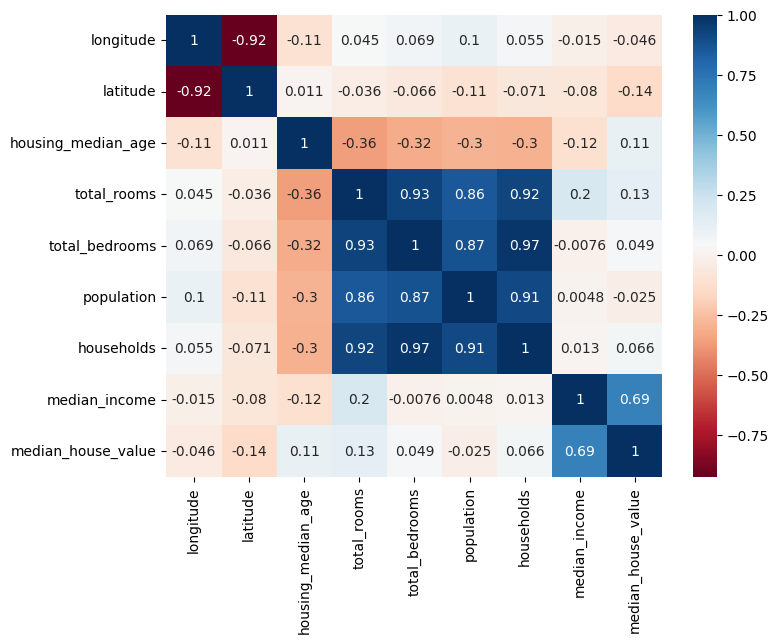

In [9]:
plt.figure(figsize=(8,6),dpi=100)
sns.heatmap(df.drop('ocean_proximity', axis=1).corr(), annot=True, cmap='RdBu')
# to drop a column, use axis=1
# to drop a row, use axis=0

if median house value was the target, we can easily see that 

the median income has high correlation with it 

why?
- more income = more expensive houses 

or you can use a scatter plot to show the relationship between median income and median house value

<Axes: xlabel='median_income', ylabel='median_house_value'>

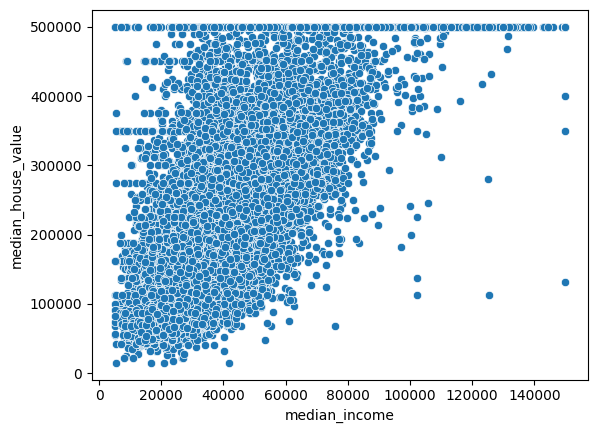

In [10]:
# wrong syntax: sns.scatterplot(df['median_income'], df['median_house_value'])4
# seaborn expects keyword argument (x=, y=, or data=)
sns.scatterplot(
    x = df['median_income']*10000,
    y = df['median_house_value']
)

Key observations
1. **Positive Correlation**:

There is a general upward trend — as **median\_income** increases, **median\_house\_value** also tends to increase. This suggests a **positive correlation**: wealthier areas tend to have more expensive houses.

2. **Cap at \$500,000**:

There is a **noticeable horizontal line** at **\$500,000** for `median_house_value`. This flat top indicates a **data cap or ceiling** — likely an **upper limit in the dataset** (e.g., due to data collection or privacy constraints). Values above this are possibly clipped or truncated.

3. **Data Density**:

Most of the data is concentrated:

* **median\_income**: Below \$80,000 (especially between \$10,000–\$60,000).
* **median\_house\_value**: Below \$400,000.

There are **few extreme outliers** with higher incomes or lower house values that don’t follow the trend as closely.



## Linear Regression

In [11]:
df = df.drop('ocean_proximity', axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


### 1. Divide the data into training and testing set

In [12]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

We shuffle the rows randomly, and then we take the first 80% as the training data and the remaining 20% as the test data.

But because you are setting a `random_state`, the random shuffle that happens to split the data will always be the same, just like fixing a seed.

Next time, when you run the script, even though the rows will be shuffled but the same order will be maintained.

Every run with random_state=42 will give the same exact split:
- Train: [1, 3, 2, 5, 4]
- Test: [6, 7, 8]


### 2. Now split the training and testing data into features and label

In [13]:
# x is the feature, y is the label
train_x = train_df.drop(columns='median_house_value')
train_y = train_df['median_house_value']

test_x = test_df.drop(columns='median_house_value')
test_y = test_df['median_house_value']

### 3. Now train the linear regression model

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

### 4. Evaluate

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(test_x)
mse = mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

MSE: 5059928371.17
R² Score: 0.6139


### 5. Visualize Predictions

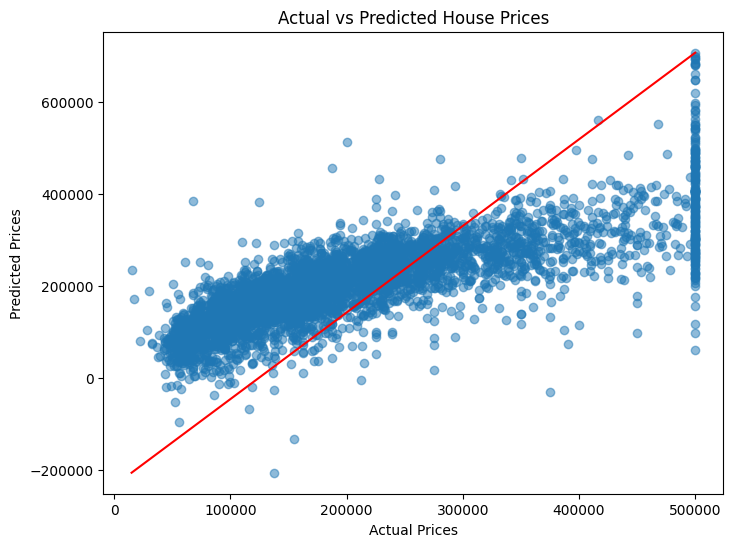

In [16]:
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(test_y, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([test_y.min(), test_y.max()], [y_pred.min(), y_pred.max()], color='red')
plt.show()

+ Spread around the line shows error.
+ A perfect model will have all points lie exactly on the red line. 
+ If a point is above the red line, the model over-predicted.
+ If a point is below the red line, the model under-predicted. 
+ If the points are spread evenly around the red line (which is the case here), your model is doing reasonably well. 
+ If the spread is wide and inconsistent, your model is making large errors.

### 6. Residual plot


1. help visualize where your model is off
2. residuals = predicted value - actual value
3. this is a histogram of residuals 
4. the x-axis shows the residual values (errors)
5. the y-axis show how many predictions had that error

Text(0.5, 1.0, 'Residual Distribution')

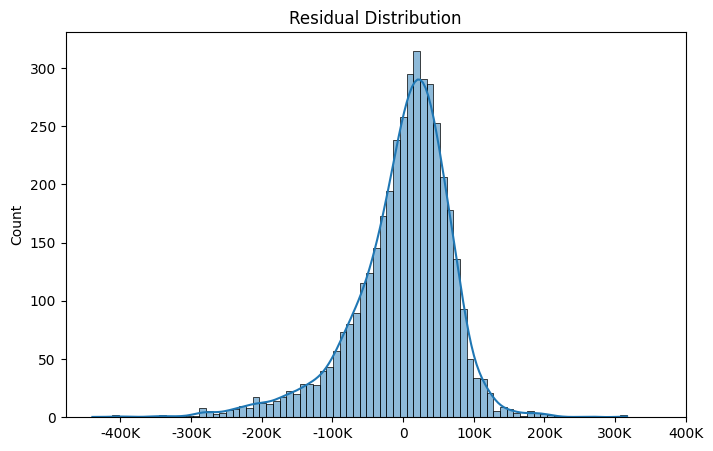

In [17]:
import seaborn as sns

# test y was a pandas series while y_pred was numpy array so can't directly subttract
residuals = y_pred - test_y.values 

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.xticks(np.arange(-400000, 450000, 100000), labels=["-400K", "-300K", "-200K", "-100K", "0", "100K", "200K", "300K", "400K"])
plt.savefig("C:/self-learn/mini_projects/week2/residual_linear-regression.png", dpi=400)
plt.title("Residual Distribution")


systematic bias: 
- means model consistently favours certain type of errors because of some pattern in how it's learning the data
- for eg. it always overpredicts when location is urban or always underpredicts for large houses
- these aren't random errors. they're predictable mistakes which makes them "systematic"

bell curve suggests low systematic bias:
- most of the errors are close to 0 (the peak at 0)
- the shape is symmetric so the model is not favouring one side (not always over or under predicting)

other points:
- shows the peak at 0 means most predictions had no error 
- bell shaped suggests no systematic bias (like always overpredicting or underpredicting)
- tapers off gradually from very large errors on either side 

## Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(train_x, train_y)
y_poly_pred = model.predict(test_x)

# what i have been calling mean accuracy is actually r2_score
# print(model.score(test_x, test_y)) # performs better by 3% lmao
print(r2_score(test_y, y_poly_pred)) # almost same as above

0.6445338501063937


Text(0.5, 1.0, 'Residual Distribution')

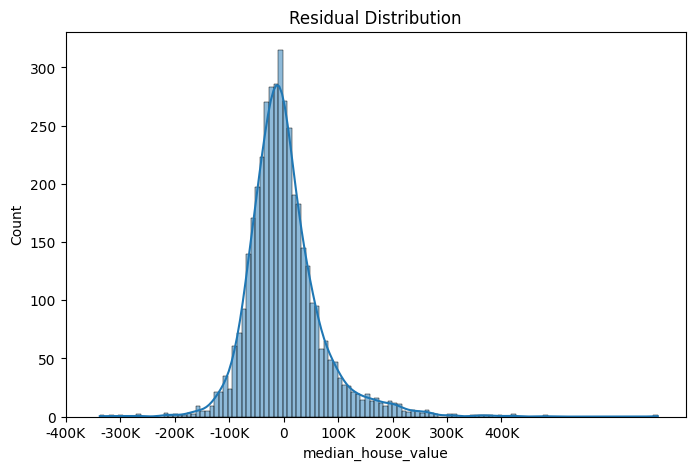

In [19]:
import seaborn as sns

residuals = test_y - y_poly_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.xticks(np.arange(-400000, 450000, 100000), labels=["-400K", "-300K", "-200K", "-100K", "0", "100K", "200K", "300K", "400K"])
plt.title("Residual Distribution")


## Random Forrest Regressor 

In [20]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_x, train_y)
y_pred = model.predict(test_x)


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)
# mean_accuracy = model.score(test_x, test_y) (same as r2, damn!)


print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2488059936.8590016
R-squared: 0.8101310370904977


much better than 61% mean accuracy of linear regression

lets again check residual

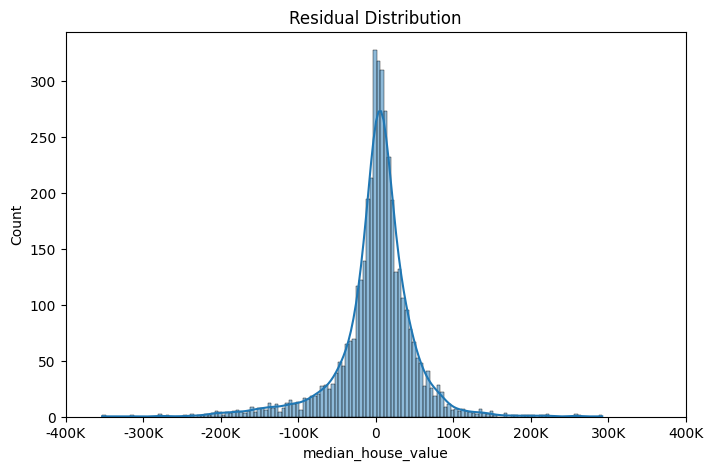

In [22]:
residual = y_pred - test_y
plt.figure(figsize=(8,5))
plt.title("Residual Distribution")
sns.histplot(residual, kde=True)
plt.xticks(np.arange(-400000, 450000, 100000), labels=["-400K", "-300K", "-200K", "-100K", "0", "100K", "200K", "300K", "400K"])
plt.savefig("C:/self-learn/mini_projects/week2/residual_randomforest.png", dpi=400)
plt.show()


we can clearly see that the bell has constricted (feels squished) because the accuracy has significantly increased from 62% to 81% (random forest regressor vs linear regression)

## Summary & Improvements

- for this problem, we observe the following relationship among the three models which we used to predict house values:

`random forest regressor > polynomial regressor > linear regression`

(81% > 64% > 61%)

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, train_x, train_y, cv=5, scoring='r2')
print("Mean R²:", scores.mean())
print("Std deviation:", scores.std())


Mean R²: 0.8128308826682199
Std deviation: 0.003089653779272373


Using K-Fold CV also shows that the model isn't biased because of a lucky split. 

Hence, proves that our model is generalizing well to unseen data.